In [1]:
#pip install torchvision

In [2]:
#pip install torch -U

## Load the data

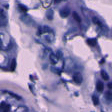

In [3]:
import pandas as pd
from PIL import Image
import torch

# Load the image
image_path = 'image_slice.png'
image = Image.open(image_path)

image

In [4]:
image.size

(112, 112)

### Preprocess the Image

In [5]:
from torchvision import transforms

# Define preprocessing transformations
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Apply preprocessing
image_tensor = preprocess(image).unsqueeze(0)

image_tensor

tensor([[[[ 0.1083,  0.1426,  0.1939,  ...,  1.0331,  1.0331,  1.0331],
          [ 0.1083,  0.1426,  0.1939,  ...,  1.0502,  1.0331,  1.0331],
          [ 0.1083,  0.1254,  0.1768,  ...,  1.0844,  1.0502,  1.0331],
          ...,
          [-1.2788, -1.2617, -1.2274,  ...,  0.7762,  0.7933,  0.7933],
          [-1.2274, -1.2103, -1.1932,  ...,  0.8618,  0.8961,  0.9132],
          [-1.2103, -1.1932, -1.1760,  ...,  0.8961,  0.9474,  0.9646]],

         [[ 0.0651,  0.1001,  0.1527,  ...,  0.8880,  0.9055,  0.9230],
          [ 0.0651,  0.1001,  0.1527,  ...,  0.9055,  0.9230,  0.9230],
          [ 0.0651,  0.1001,  0.1527,  ...,  0.9230,  0.9405,  0.9405],
          ...,
          [-1.1078, -1.1078, -1.0903,  ...,  0.6429,  0.6429,  0.6604],
          [-1.0903, -1.0903, -1.0728,  ...,  0.7304,  0.7654,  0.7829],
          [-1.0728, -1.0728, -1.0728,  ...,  0.7654,  0.8179,  0.8354]],

         [[ 1.3502,  1.3851,  1.4374,  ...,  1.5420,  1.5420,  1.5420],
          [ 1.3502,  1.3851,  

In [6]:
image_tensor.size()

torch.Size([1, 3, 224, 224])

In [7]:
# Load the gene embeddings
gene_embeddings_path = 'gene_embeddings.csv'
gene_embeddings = pd.read_csv(gene_embeddings_path, header=None)

# Convert gene embeddings to tensor
gene_embeddings_tensor = torch.tensor(gene_embeddings.values, dtype=torch.float32, )

# Print gene embeddings
print(gene_embeddings_tensor)

tensor([[ 2.1550,  0.6653, -0.8809,  ..., -0.7182,  1.8132,  0.3313],
        [ 1.5075,  0.1852, -0.0978,  ...,  0.4184, -0.0385,  0.8133],
        [ 0.9532,  0.7457, -0.0794,  ..., -2.1148,  0.1122, -3.6200],
        ...,
        [ 1.0090,  0.3137,  0.2039,  ..., -1.0399, -1.0522,  0.9152],
        [-0.3315,  1.0933, -0.0119,  ..., -0.1787, -1.3815, -0.8133],
        [-0.7239,  0.1593,  1.2298,  ..., -1.1029, -1.1785, -1.8659]])


In [8]:
gene_embeddings_tensor.shape

torch.Size([1176, 512])

## Running CellViT

In [11]:
#torch.__version__

In [12]:
'''
import sys
sys.path.append('~/home/dsikdar/zhanglab_research/GenAI/CellViT')
import cellvit
from cellvit import CellViTModel  # Adjust based on the actual import path
'''

"\nimport sys\nsys.path.append('~/home/dsikdar/zhanglab_research/GenAI/CellViT')\nimport cellvit\nfrom cellvit import CellViTModel  # Adjust based on the actual import path\n"

In [13]:
'''
# Load the pretrained CellViT model or initialize a new one
model = CellViTModel.from_pretrained('cellvit-base')  # Adjust as necessary

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
image_tensor = image_tensor.to(device)
gene_embeddings_tensor = gene_embeddings_tensor.to(device)
'''

"\n# Load the pretrained CellViT model or initialize a new one\nmodel = CellViTModel.from_pretrained('cellvit-base')  # Adjust as necessary\n\n# Move model to GPU if available\ndevice = torch.device('cuda' if torch.cuda.is_available() else 'cpu')\nmodel.to(device)\nimage_tensor = image_tensor.to(device)\ngene_embeddings_tensor = gene_embeddings_tensor.to(device)\n"

In [14]:
'''
# Assuming the model takes both image and gene embeddings as input
# Adjust the function call based on actual implementation
outputs = model(image_tensor, gene_embeddings_tensor)

# Extract desired outputs
image_embeddings = outputs['image_embeddings']
gene_embeddings = outputs['gene_embeddings']
'''

"\n# Assuming the model takes both image and gene embeddings as input\n# Adjust the function call based on actual implementation\noutputs = model(image_tensor, gene_embeddings_tensor)\n\n# Extract desired outputs\nimage_embeddings = outputs['image_embeddings']\ngene_embeddings = outputs['gene_embeddings']\n"

In [15]:
#image_embeddings

In [16]:
#gene_embeddings

In [17]:
### BACK UP OPTION ### --without--CellViT--working--

from transformers import ViTFeatureExtractor
from transformers import ViTModel

feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
inputs = feature_extractor(images=image, return_tensors="pt")

# Load a pretrained ViT model
model = ViTModel.from_pretrained('google/vit-base-patch16-224')

# Get the outputs from the ViT model
outputs = model(**inputs)
image_embeddings = outputs.last_hidden_state

/pkg/anaconda3/2023.07/lib/python3.11/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.weight', 'vit.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Training the CLIP model

In [21]:
from transformers import CLIPProcessor, CLIPModel

processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")

In [24]:
# Assuming gene_embeddings_tensor is (batch_size, gene_context_length, embed_dim)
# Flatten the gene embeddings to (batch_size, gene_context_length * embed_dim)
gene_embeddings_flattened = gene_embeddings_tensor.view(gene_embeddings_tensor.size(0), -1)

In [27]:
# Prepare the inputs for the CLIP model
inputs = processor(text=gene_embeddings_flattened, images=image, return_tensors="pt", padding=True)

ValueError: text input must of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).

In [20]:
from torch.optim import Adam
from torch.nn import CrossEntropyLoss

optimizer = Adam(model.parameters(), lr=1e-5)
criterion = CrossEntropyLoss()

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    logits_per_text = outputs.logits_per_text

    # Calculate loss
    labels = torch.arange(len(image_embeddings)).to(logits_per_image.device)
    loss = (criterion(logits_per_image, labels) + criterion(logits_per_text, labels)) / 2

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch + 1}, Loss: {loss.item()}")

AttributeError: 'BaseModelOutputWithPooling' object has no attribute 'logits_per_image'

In [ ]:
model.eval()
with torch.no_grad():
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    logits_per_text = outputs.logits_per_text
    probs = logits_per_image.softmax(dim=-1)